In [1]:
import os as os
import pandas as pd 
import numpy as np
from sklearn import datasets
from sklearn import linear_model
import seaborn.apionly as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='whitegrid', context='notebook')
# os.chdir("Chapter4")
# os.getcwd()

/usr/lib64/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/usr/lib64/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/usr/lib/python3.6/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


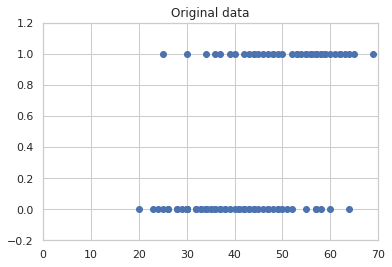

In [2]:
# Displaying original data
# Displaying original data

df = pd.read_csv("data/CHD.csv", header=0)
plt.figure()
plt.axis([0, 70, -0.2, 1.2])
plt.title("Original data")
plt.scatter(df['age'], df['chd'])  # Plot a scatter draw of the random data points
plt.show()


In [3]:
# Creating logistic regression model
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(df['age'].values.reshape(100, 1), df['chd'].values.reshape(100, 1))

linear_model.LogisticRegression(C=100000.0, class_weight=None, dual=False,
                                fit_intercept=True, intercept_scaling=1, max_iter=100,
                                multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                                solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

x_plot = np.linspace(10, 90, 100)
oneprob = []
zeroprob = []
predict = []
plt.figure(figsize=(10, 10))
for i in x_plot:
    oneprob.append(logistic.predict_proba(i)[0][1])
    zeroprob.append(logistic.predict_proba(i)[0][0])
    predict.append(logistic.predict(i)[0])

plt.plot(x_plot, oneprob)
plt.plot(x_plot, zeroprob)
plt.plot(x_plot, predict)
plt.scatter(df['age'], df['chd'])
plt.show()


/usr/lib64/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib64/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Expected 2D array, got scalar array instead:
array=10.0.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

<Figure size 720x720 with 0 Axes>